In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Consider N points on a sphere of unit radius, where the N points are 
# distributed according to the golden spiral method
#
# We expect the minimum distance to scale like ~ 1/n^(1/2), but what is the proportionality factor?

In [327]:
def gen_pos_golden_spiral(N):

    indices = np.arange(0, N) + 0.5

    phi = np.arccos(1. - 2.*indices/N)
    theta = np.pi * (3. + 5.**0.5) * indices

    x, y, z = np.cos(theta) * np.sin(phi), np.sin(theta) * np.sin(phi), np.cos(phi)
    return np.transpose([x, y, z])

In [4]:
@njit
def find_min_distance(pos):
    min_dist = 10
    for i in range(len(pos)):
        for j in range(i+1, len(pos)):
            dist = (pos[i][0]-pos[j][0])**2. + (pos[i][1]-pos[j][1])**2. + (pos[i][2]-pos[j][2])**2.
            if dist < min_dist:
                min_dist = dist
    return np.sqrt(min_dist)

In [5]:
pos = gen_pos_golden_spiral(64)
d = find_min_distance(pos)

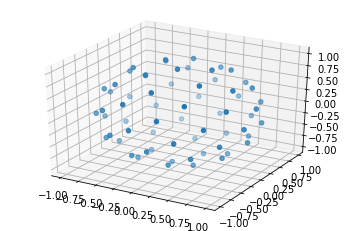

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:,0], pos[:,1], pos[:,2])

In [23]:
2**12

4096

In [31]:
Nlist = []
dlist = []
for i in range(16):
    N = 2**i
    pos = gen_pos_golden_spiral(N)
    d = find_min_distance(pos)
    
    Nlist.append(N)
    dlist.append(d)

Nlist = np.array(Nlist)
dlist = np.array(dlist)

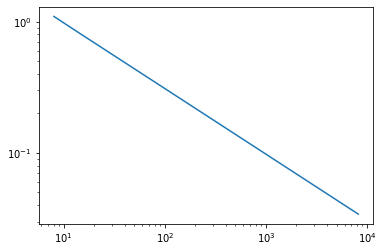

In [28]:
plt.plot(Nlist[3:], dlist[3:])
plt.xscale('log')
plt.yscale('log')

In [47]:
from scipy.optimize import curve_fit

def to_minimize(N, C):
    return C * np.sqrt(4*np.pi) * N**(-0.5)

popt, pcov = curve_fit(to_minimize, Nlist[7:], dlist[7:], sigma = 1./Nlist[7:])
print(popt)

[0.87224949]


In [ ]:
plt.scatter(Nlist, dlist)

x = np.logspace(0)

plt.xscale('log')
plt.yscale('log')

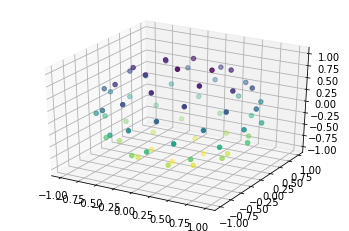

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(64))

In [328]:
from numpy import pi, cos, sin, sqrt, arange
import matplotlib.pyplot as plt

def plot_spiral(p, num_pts=100):
    indices = arange(0, num_pts, dtype=float) + 0.5

    r = np.sqrt(indices/num_pts)
    theta = pi * 2* p * indices

    # pl(1.0)
    plt.scatter(r*cos(theta), r*sin(theta), c=indices)
    plt.colorbar()
    ax = plt.gca()
    ax.set_aspect(1.0)

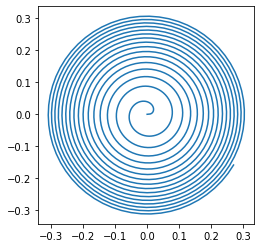

In [100]:
N = 100
golden = (1 + 5**0.5)/2.0

# theta = np.linspace(0, 100, 1000)
r = np.sqrt(theta/ (2. * np.pi * N * golden))
# r = theta
plt.plot(r*cos(theta), r*sin(theta))
ax = plt.gca()
ax.set_aspect(1.0)

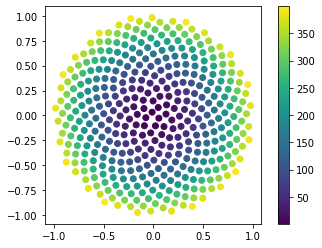

In [329]:
plot_spiral((3+np.sqrt(5))/2, 400)

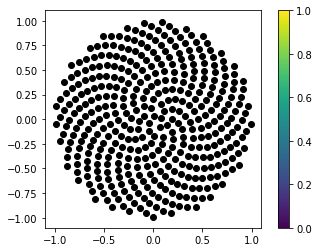

In [324]:
plot_spiral(1+np.sqrt(2), 400)

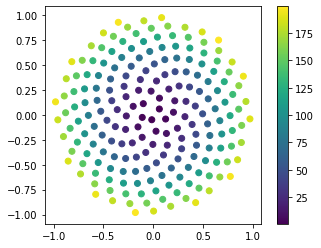

In [145]:
plot_spiral(np.sqrt(2), 200)

In [49]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [50]:
interact(plot_spiral, p=5)

interactive(children=(IntSlider(value=5, description='p', max=15, min=-5), Output()), _dom_classes=('widget-in…

<function __main__.plot_spiral(p)>

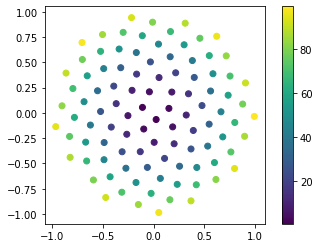

In [66]:
plot_spiral(5)

In [162]:
def gen_pos_golden_spiral(N):

    indices = np.arange(0, N) + 0.5

    phi = np.arccos(1. - 2.*indices/N)
    theta = np.pi * (1. + 5.**0.5) * indices
#     phi = np.pi * np.sqrt(2) * indices
    
    r = np.power(theta/N, 1./3.)

    x, y, z = r*np.cos(theta) * np.sin(phi), r*np.sin(theta) * np.sin(phi), r*np.cos(phi)
    return np.transpose([x, y, z])

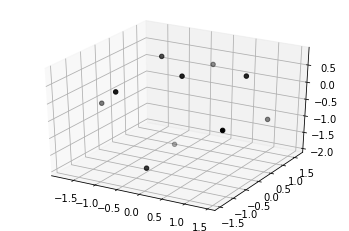

In [163]:
N = 10

pos = gen_pos_golden_spiral(N)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(N))
ax.scatter(pos[:,0], pos[:,1], pos[:,2], c='k')

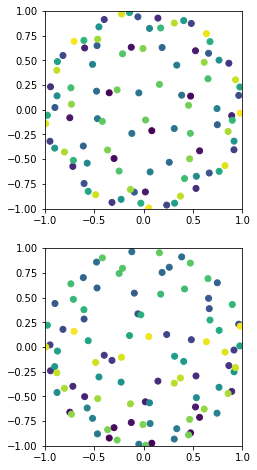

In [335]:
def gen_pos_golden_spiral(N):

    indices = np.arange(0, N) + 0.5
    golden = (1.+np.sqrt(5))/2.
#     golden = 1. * np.sqrt(2)

#     phi = np.mod(2.*np.pi * (1.+5.**0.5)/2*np.arccos(1. - 2.*indices/N), np.pi)
#     phi = np.arccos(2.*indices/N - 1)
    phi = np.arccos(np.mod(2.*(golden+1)*indices/N, 2.) - 1)

#     print(phi)
    theta = np.pi * (1. + 5.**0.5) * indices
#     phi = np.pi * np.sqrt(2) * indices
    
#     r = np.power(indices/N, 1./3.)
    r = 1

    x, y, z = r*np.cos(theta) * np.sin(phi), r*np.sin(theta) * np.sin(phi), r*np.cos(phi)
    return np.transpose([x, y, z])

N = 100

pos = gen_pos_golden_spiral(N)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

np.savetxt('pos.txt', pos)

ax[0].scatter(pos[:,0], pos[:,1], c=np.arange(N))
ax[1].scatter(pos[:,0], pos[:,2], c=np.arange(N))
for x in ax:
    x.set(xlim=(-1, 1), ylim=(-1, 1))
    x.set_aspect(1.0)

plt.show()

In [256]:
indices = np.arange(0, 1000) + 0.5

(array([114., 110., 113., 110., 112., 112., 110., 111., 108.]),
 array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
         0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ]),
 <a list of 9 Patch objects>)

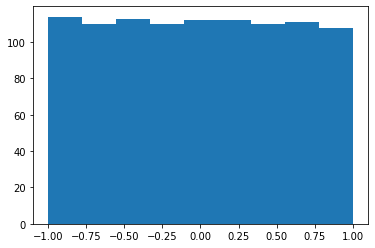

In [257]:
plt.hist(np.mod(golden*indices/2, 2.) - 1, bins=np.linspace(-1, 1, 10))

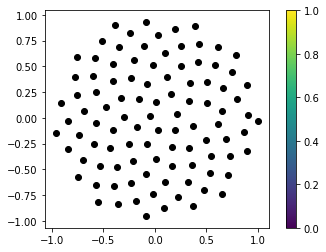

In [311]:
from numpy import pi, cos, sin, sqrt, arange
import matplotlib.pyplot as plt

def plot_r_spiral(num_pts=100):
    indices = arange(0, num_pts, dtype=float) + 0.5
    
    theta = 2.*np.pi*indices / num_pts
    r = np.sqrt(np.mod((1.+5.**0.5)/2 * indices, 1.))

    # pl(1.0)
    plt.scatter(r*cos(theta), r*sin(theta), c='k')
    plt.colorbar()
    ax = plt.gca()
    ax.set_aspect(1.0)
    
plot_r_spiral(100)

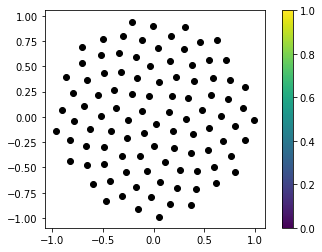

In [297]:
from numpy import pi, cos, sin, sqrt, arange
import matplotlib.pyplot as plt

def plot_spiral(p, num_pts=100):
    indices = arange(0, num_pts, dtype=float) + 0.5

    r = np.sqrt(indices/num_pts)
    theta = pi * 2* p * indices

    # pl(1.0)
#     plt.scatter(r*cos(theta), r*sin(theta), c=indices)
    plt.scatter(r*cos(theta), r*sin(theta), c='k')
    plt.colorbar()
    ax = plt.gca()
    ax.set_aspect(1.0)
plot_spiral((1.+5.**0.5)/2.)

In [ ]:
f = np.random.rand(N)
    sqrtf = np.sqrt(f)
    rt = np.divide(sqrtf, np.subtract(1., sqrtf))

0.73475
0.7346938775510203


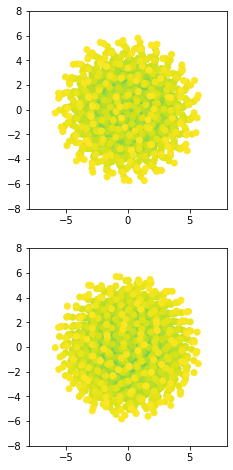

In [360]:
def gen_pos_golden_spiral(N):
    pos = np.zeros((N, 3))
    
    g = 1.32471795724474602596
    a1 = 1.0/g
    a2 = 1.0/(g*g)
    for i in range(N):
        cphi = 2.0 * (np.mod((0.5 + a1*i), 1.0) - 0.5)
        phi = np.arccos(cphi)
        theta = 2.*np.pi*np.mod((0.5 + a2*i), 1.0)
        
        sqrtf = np.sqrt((0.5+i)/N)
        r = sqrtf / (1. - sqrtf)
        
        x, y, z = r * np.cos(theta) * np.sin(phi), r * np.sin(theta) * np.sin(phi), r * np.cos(phi)
        pos[i][0] = x
        pos[i][1] = y
        pos[i][2] = z
    
    r = np.linalg.norm(pos, axis=1)
    
    return pos[r<6]

N = 8000

pos = gen_pos_golden_spiral(N)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

print(len(pos)/N)
print((6/7)**2)

np.savetxt('pos.txt', pos)

ax[0].scatter(pos[:,0], pos[:,1], c=np.arange(len(pos)))
ax[1].scatter(pos[:,0], pos[:,2], c=np.arange(len(pos)))
for x in ax:
    x.set(xlim=(-8, 8), ylim=(-8, 8))
    x.set_aspect(1.0)

plt.show()